# 다음 증권 페이지 크롤링

In [1]:
import requests

In [2]:
e = requests.session()
res = e.get('https://finance.daum.net/')

In [3]:
res

<Response [200]>

In [4]:
res.ok

True

In [5]:
res.headers

{'Date': 'Wed, 06 Jul 2022 02:57:33 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=15552000; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'ETag': 'W/"253f-ISUi9AsSyRBzOtuUc9/sOVLbS0k"', 'Content-Encoding': 'gzip'}

In [6]:
e.close()

## 국내외 지수 가져오기

In [8]:
import requests
import json

In [10]:
e = requests.session()
base_url = 'https://finance.daum.net/api/quotes/today?'

### 미국지수 요청 url

In [11]:
url = 'https://finance.daum.net/api/quotes/today?type=USA'

In [12]:
res = e.get(url)

In [13]:
res.ok

False

In [14]:
res.reason

'Forbidden'

In [17]:
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
    'referer':'https://finance.daum.net/'
}

In [19]:
res = e.get(url, headers = headers)
res.ok

True

In [20]:
res.json()

{'data': [{'symbolCode': 'US.DJI',
   'code': 'US.DJI',
   'openingPrice': 30903.12,
   'highPrice': 30971.74,
   'lowPrice': 30355.12,
   'tradePrice': 30967.82,
   'prevClosingPrice': 31097.26,
   'change': 'FALL',
   'changePrice': 129.44,
   'changeRate': 0.0041624246,
   'name': '미국 다우 산업',
   'date': '2022-07-05',
   'tradeDate': '20220705',
   'tradeTime': '160345',
   'exchangeDate': '2022-07-05 16:03:45',
   'exchangeCountry': 'USA',
   'securityGroup': None,
   'market': 'DJI',
   'isIndex': True,
   'accTradePrice': 0,
   'accTradeVolume': 316311459,
   'prevAccTradeVolume': None,
   'prevAccTradeVolumeChangeRate': None,
   'marketCap': 0,
   'marketCapRank': None,
   'high52wPrice': 36952.65,
   'high52wDate': '2022-01-05',
   'low52wPrice': 29653.29,
   'low52wDate': '2022-06-17',
   'basePrice': 31097.26,
   'upperLimitPrice': None,
   'lowerLimitPrice': None,
   'foreignRatio': None,
   'prevForeignRatio': None,
   'foreignOwnShares': None,
   'parValue': None,
   'eps':

In [21]:
data_list = res.json().get('data')

In [22]:
len(data_list)

2

In [23]:
data_list[0]

{'symbolCode': 'US.DJI',
 'code': 'US.DJI',
 'openingPrice': 30903.12,
 'highPrice': 30971.74,
 'lowPrice': 30355.12,
 'tradePrice': 30967.82,
 'prevClosingPrice': 31097.26,
 'change': 'FALL',
 'changePrice': 129.44,
 'changeRate': 0.0041624246,
 'name': '미국 다우 산업',
 'date': '2022-07-05',
 'tradeDate': '20220705',
 'tradeTime': '160345',
 'exchangeDate': '2022-07-05 16:03:45',
 'exchangeCountry': 'USA',
 'securityGroup': None,
 'market': 'DJI',
 'isIndex': True,
 'accTradePrice': 0,
 'accTradeVolume': 316311459,
 'prevAccTradeVolume': None,
 'prevAccTradeVolumeChangeRate': None,
 'marketCap': 0,
 'marketCapRank': None,
 'high52wPrice': 36952.65,
 'high52wDate': '2022-01-05',
 'low52wPrice': 29653.29,
 'low52wDate': '2022-06-17',
 'basePrice': 31097.26,
 'upperLimitPrice': None,
 'lowerLimitPrice': None,
 'foreignRatio': None,
 'prevForeignRatio': None,
 'foreignOwnShares': None,
 'parValue': None,
 'eps': None,
 'dps': None,
 'per': None,
 'bps': None,
 'pbr': None,
 'sectorCode': 'DJI

In [24]:
data_dict = {}
data_dict['name'] = data_list[0]['name']
data_dict['sectorCode'] = data_list[0]['sectorCode']
data_dict['tradePrice'] = data_list[0]['tradePrice']
data_dict['changePrice'] = data_list[0]['changePrice']
data_dict['changeRate'] = data_list[0]['changeRate']
data_dict['highPrice'] = data_list[0]['highPrice']
data_dict['lowPrice'] = data_list[0]['lowPrice']

In [25]:
data_dict

{'name': '미국 다우 산업',
 'sectorCode': 'DJI',
 'tradePrice': 30967.82,
 'changePrice': 129.44,
 'changeRate': 0.0041624246,
 'highPrice': 30971.74,
 'lowPrice': 30355.12}

In [26]:
index_list = []
for data in data_list:
    data_dict = {}
    data_dict['name'] = data['name']
    data_dict['sectorCode'] = data['sectorCode']
    data_dict['tradePrice'] = data['tradePrice']
    data_dict['changePrice'] = data['changePrice']
    data_dict['changeRate'] = data['changeRate']
    data_dict['highPrice'] = data['highPrice']
    data_dict['lowPrice'] = data['lowPrice']
    index_list.append(data_dict)

In [27]:
index_list

[{'name': '미국 다우 산업',
  'sectorCode': 'DJI',
  'tradePrice': 30967.82,
  'changePrice': 129.44,
  'changeRate': 0.0041624246,
  'highPrice': 30971.74,
  'lowPrice': 30355.12},
 {'name': '나스닥 종합',
  'sectorCode': 'OMP',
  'tradePrice': 11322.238,
  'changePrice': 194.392,
  'changeRate': 0.0174689693,
  'highPrice': 11323.895,
  'lowPrice': 10911.453}]

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(index_list)

In [30]:
df

,name,sectorCode,tradePrice,changePrice,changeRate,highPrice,lowPrice
0,미국 다우 산업,DJI,30967.820,129.440,0.004162,30971.740,30355.120
1,나스닥 종합,OMP,11322.238,194.392,0.017469,11323.895,10911.453


In [31]:
params = ['DOMESTIC', 'USA', 'ASIA', 'EUROPE']

In [33]:
for param in params:
    url = f'https://finance.daum.net/api/quotes/today?type={param}'
    print(url)

https://finance.daum.net/api/quotes/today?type=DOMESTIC
https://finance.daum.net/api/quotes/today?type=USA
https://finance.daum.net/api/quotes/today?type=ASIA
https://finance.daum.net/api/quotes/today?type=EUROPE


In [34]:
import time

In [35]:
for param in params:
    e = requests.session()
    url = f'https://finance.daum.net/api/quotes/today?type={param}'
    res = e.get(url, headers = headers)
    print(url)
    print(res.ok)
    
    e.close()
    time.sleep(2)

https://finance.daum.net/api/quotes/today?type=DOMESTIC
True
https://finance.daum.net/api/quotes/today?type=USA
True
https://finance.daum.net/api/quotes/today?type=ASIA
True
https://finance.daum.net/api/quotes/today?type=EUROPE
True


In [36]:
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
    'referer':'https://finance.daum.net/'
}
index_list = []
for param in params:
    e = requests.session()
    url = f'https://finance.daum.net/api/quotes/today?type={param}'
    res = e.get(url, headers = headers)
    data_list = res.json().get('data')
    for data in data_list:
        data_dict = {}
        data_dict['name'] = data['name']
        data_dict['market'] = data['market']
        data_dict['tradePrice'] = data['tradePrice']
        data_dict['changePrice'] = data['changePrice']
        data_dict['changeRate'] = data['changeRate']
        index_list.append(data_dict)
    
    print(url)
    print(res.ok)
    e.close()
    time.sleep(2)

https://finance.daum.net/api/quotes/today?type=DOMESTIC
True
https://finance.daum.net/api/quotes/today?type=USA
True
https://finance.daum.net/api/quotes/today?type=ASIA
True
https://finance.daum.net/api/quotes/today?type=EUROPE
True


In [37]:
index_list

[{'name': '코스피 지수',
  'market': 'KOSPI',
  'tradePrice': 2312.62,
  'changePrice': 29.16,
  'changeRate': 0.0124520664},
 {'name': '코스닥 지수',
  'market': 'KOSDAQ',
  'tradePrice': 753.7,
  'changePrice': 2.75,
  'changeRate': 0.0036620281},
 {'name': '미국 다우 산업',
  'market': 'DJI',
  'tradePrice': 30967.82,
  'changePrice': 129.44,
  'changeRate': 0.0041624246},
 {'name': '나스닥 종합',
  'market': 'NAI',
  'tradePrice': 11322.238,
  'changePrice': 194.392,
  'changeRate': 0.0174689693},
 {'name': '중국 상해 종합',
  'market': 'SHS',
  'tradePrice': 3365.052,
  'changePrice': 38.973,
  'changeRate': 0.0114490934},
 {'name': '일본 니케이 225',
  'market': 'NII',
  'tradePrice': 26089.86,
  'changePrice': 333.61,
  'changeRate': 0.0126255181},
 {'name': '영국 FTSE 100',
  'market': 'LSE',
  'tradePrice': 7025.47,
  'changePrice': 207.18,
  'changeRate': 0.0286451024},
 {'name': '독일 DAX',
  'market': 'FWB',
  'tradePrice': 12401.2,
  'changePrice': 372.18,
  'changeRate': 0.0291371587}]

In [38]:
df = pd.DataFrame(index_list)
df

,name,market,tradePrice,changePrice,changeRate
0,코스피 지수,KOSPI,2312.620,29.160,0.012452
1,코스닥 지수,KOSDAQ,753.700,2.750,0.003662
2,미국 다우 산업,DJI,30967.820,129.440,0.004162
3,나스닥 종합,NAI,11322.238,194.392,0.017469
4,중국 상해 종합,SHS,3365.052,38.973,0.011449
5,일본 니케이 225,NII,26089.860,333.610,0.012626
6,영국 FTSE 100,LSE,7025.470,207.180,0.028645
7,독일 DAX,FWB,12401.200,372.180,0.029137


#### 함수화

In [39]:
#params = ['DOMESTIC', 'USA', 'ASIA', 'EUROPE']

def index_crawl(params:list):
    headers={
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36',
        'Referer': 'http://finance.daum.net/'
    }
    index_list = []
    for param in params:
        print('start:'+param)
        e = requests.session()
        url = f'http://finance.daum.net/api/quotes/today?type={param}'
        res = e.get(url, headers=headers)
        data_list = res.json().get('data')

        for data in data_list:
            data_dict={}
            data_dict['name']=data['name']
            data_dict['market']= data['market']
            data_dict['tradePrice']=data['tradePrice']
            data_dict['changePrice']=data['changePrice']
            data_dict['changeRate']=data['changeRate']
            data_dict['highInYearPrice']=data['highInYearPrice']
            data_dict['lowInYearPrice']=data['lowInYearPrice']
            index_list.append(data_dict)

        e.close()
        print('end:'+param)
        time.sleep(2)
    df = pd.DataFrame(index_list)
    return df

In [41]:
params = ['USA', 'ASIA']
index_crawl(params)

start:USA
end:USA
start:ASIA
end:ASIA


,name,market,tradePrice,changePrice,changeRate,highInYearPrice,lowInYearPrice
0,미국 다우 산업,DJI,30967.820,129.440,0.004162,36952.650,29653.290
1,나스닥 종합,NAI,11322.238,194.392,0.017469,15852.136,10565.135
2,중국 상해 종합,SHS,3363.747,40.279,0.011833,3651.892,2863.650
3,일본 니케이 225,NII,26089.860,333.610,0.012626,29388.160,24681.740


## 환율 및 주요지표

In [79]:
import requests
import json

In [49]:
e = requests.session()
res = e.get('https://finance.daum.net/global')
res.ok

True

In [50]:
res.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta property="og:site_name" content="다음금융" />\n<meta property="og:image" content="https://t1.daumcdn.net/media/finance_og.png" />\n<link rel="shortcut icon" href="//finance.daum.net/favicon.ico" type="image/x-icon" />\n\n<title>해외 | 다음 금융 </title>\n\n<link rel="stylesheet" type="text/css" href="/dist/common.css?v=1653455545" />\n<link rel="stylesheet" type="text/css" href="/dist/custom.ui.css?v=1653455545" />\n\n<script>\n    window.REQUEST_URI = \'/global\';\n    window.CURRENT_URL = encodeURIComponent(\n        "".concat(\n            window.location.protocol,\n            "//",\n            window.location.host,\n            window.location.pathname,\n            window.location.search\n        )\n    );\n    window.FINANCE = {};\n    window.FINANCE.BASE_URL = \'/dist\';\n    window.FINANCE.VERSION = \'16534

In [71]:
from fake_useragent import UserAgent
ua = UserAgent() 

headers ={
    'User-Agent' : ua.ie,
    'referer' : 'http://finance.daum.net/global'
}

In [72]:
headers

{'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0; yie8)',
 'referer': 'http://finance.daum.net/global'}

In [85]:
url = 'https://finance.daum.net/api/global/major_indexes'

In [86]:
e = requests.session()
res = e.get(url, headers = headers)

In [87]:
res.ok

True

In [88]:
res

<Response [200]>

In [89]:
res.json()

[{'symbolCode': 'FOREX-FRX.KRWUSD',
  'name': '미국 (KRW/USD)',
  'date': '2022-07-06',
  'country': '미국',
  'region': 'america',
  'tradePrice': 1305.7,
  'tradeDate': '2022-07-06',
  'change': 'FALL',
  'changeRate': -0.0044224171,
  'changePrice': -5.8},
 {'symbolCode': 'FOREX-FRX.KRWJPY',
  'name': '일본 (KRW/JPY100)',
  'date': '2022-07-06',
  'country': '일본',
  'region': 'asia',
  'tradePrice': 964.72,
  'tradeDate': '2022-07-06',
  'change': 'FALL',
  'changeRate': -0.000673317,
  'changePrice': -0.65},
 {'symbolCode': 'FOREX-FRX.KRWEUR',
  'name': '유로 (KRW/EUR)',
  'date': '2022-07-06',
  'country': '유로',
  'region': 'europe',
  'tradePrice': 1340.3,
  'tradeDate': '2022-07-06',
  'change': 'FALL',
  'changeRate': -0.006743738,
  'changePrice': -9.1},
 {'symbolCode': 'COMMODITY-/GCc1',
  'name': '금($/온스)',
  'date': '2022-07-05',
  'country': None,
  'region': None,
  'tradePrice': 1763.9,
  'tradeDate': '2022-07-05',
  'changeRate': -0.020871496,
  'changePrice': -37.6},
 {'symbol

In [90]:
df = pd.DataFrame(res.json())
df

,symbolCode,name,date,country,region,tradePrice,tradeDate,change,changeRate,changePrice
0,FOREX-FRX.KRWUSD,미국 (KRW/USD),2022-07-06,미국,america,1305.700,2022-07-06,FALL,-0.004422,-5.800
1,FOREX-FRX.KRWJPY,일본 (KRW/JPY100),2022-07-06,일본,asia,964.720,2022-07-06,FALL,-0.000673,-0.650
2,FOREX-FRX.KRWEUR,유로 (KRW/EUR),2022-07-06,유로,europe,1340.300,2022-07-06,FALL,-0.006744,-9.100
3,COMMODITY-/GCc1,금($/온스),2022-07-05,None,None,1763.900,2022-07-05,NaN,-0.020871,-37.600
4,COMMODITY-/SIc1,은(COMEX),2022-07-05,None,None,19.121,2022-07-05,NaN,-0.027762,-0.546
5,COMMODITY-GOLD,국내 금(원/g),2022-07-06,None,None,74355.070,2022-07-06,NaN,-0.020686,-1570.570
6,COMMODITY-/CLc1,WTI 원유 선물,2022-07-05,None,None,99.500,2022-07-05,NaN,-0.082357,-8.930
7,US.SOX,필라델피아 반도체,NaN,None,None,2477.642,2022-07-05,NaN,0.007804,19.186


In [92]:
df = df.loc[:, ['name', 'tradePrice', 'changePrice', 'tradePrice']]

In [93]:
df

,name,tradePrice,changePrice,tradePrice
0,미국 (KRW/USD),1305.700,-5.800,1305.700
1,일본 (KRW/JPY100),964.720,-0.650,964.720
2,유로 (KRW/EUR),1340.300,-9.100,1340.300
3,금($/온스),1763.900,-37.600,1763.900
4,은(COMEX),19.121,-0.546,19.121
5,국내 금(원/g),74355.070,-1570.570,74355.070
6,WTI 원유 선물,99.500,-8.930,99.500
7,필라델피아 반도체,2477.642,19.186,2477.642


In [94]:
url = 'https://finance.daum.net/api/global/major_bonds'

In [95]:
e = requests.session()
res = e.get(url, headers = headers)

In [96]:
bond_df = pd.DataFrame(res.json().get('data'))
bond_df

,symbolCode,name,date,country,region,tradePrice,tradeDate,changeRate,changePrice
0,BOND-cofix,COFIX(잔액),2022-06-30,None,None,1.680,2022-06-30,0.063291,0.100
1,BOND-cofixN,COFIX(신규취급액),2022-06-30,None,None,1.980,2022-06-30,0.076087,0.140
2,BOND-cofixS,COFIX(단기),2022-06-29,None,None,2.010,2022-06-29,0.015152,0.030
3,BOND-KRCALL=HWHA,콜금리,2022-07-05,None,None,1.682,2022-07-05,0.013253,0.022
4,BOND-US10YT=XX,미국국채10년,2022-07-05,None,None,2.820,2022-07-05,-0.020833,-0.060
5,BOND-US30YT=XX,미국국채30년,2022-07-05,None,None,3.050,2022-07-05,-0.019293,-0.060


In [97]:
bond_df = bond_df.loc[:, ['name', 'tradePrice', 'changePrice', 'tradePrice']]
bond_df

,name,tradePrice,changePrice,tradePrice
0,COFIX(잔액),1.680,0.100,1.680
1,COFIX(신규취급액),1.980,0.140,1.980
2,COFIX(단기),2.010,0.030,2.010
3,콜금리,1.682,0.022,1.682
4,미국국채10년,2.820,-0.060,2.820
5,미국국채30년,3.050,-0.060,3.050


## 국내 증시 크롤링

In [98]:
e = requests.session()
ua = UserAgent()
headers = {'User-Agent' : ua.ie, 'referer' : 'https://finance.daum.net/domestic'}

In [99]:
res = e.get('https://finance.daum.net/domestic')

In [100]:
res.ok

True

In [101]:
res.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta property="og:site_name" content="다음금융" />\n<meta property="og:image" content="https://t1.daumcdn.net/media/finance_og.png" />\n<link rel="shortcut icon" href="//finance.daum.net/favicon.ico" type="image/x-icon" />\n\n<title>국내증시 | 다음 금융 </title>\n\n<link rel="stylesheet" type="text/css" href="/dist/common.css?v=1653455570" />\n<link rel="stylesheet" type="text/css" href="/dist/custom.ui.css?v=1653455570" />\n\n<script>\n    window.REQUEST_URI = \'/domestic\';\n    window.CURRENT_URL = encodeURIComponent(\n        "".concat(\n            window.location.protocol,\n            "//",\n            window.location.host,\n            window.location.pathname,\n            window.location.search\n        )\n    );\n    window.FINANCE = {};\n    window.FINANCE.BASE_URL = \'/dist\';\n    window.FINANCE.VERSION = \'1

In [102]:
 param_dict = {
    '요약': 'api/domestic/quotes?summary=true&changeStatistics=true',
    '뉴스':'content/news/ranks?limit=10&newsType=popular',
    '랭킹':'api/search/ranks?limit=10',
    '등락률_상승':'api/domestic/sectors/?pagination=true&perPage=5&change=RISE',
    '등락률_하락':'api/domestic/sectors/?pagination=true&perPage=5&change=FALL',
    '상승종목': 'api/domestic/trend/price_performance/?pagination=true&perPage=5&changeType=RISE',
    '하락종목': 'api/domestic/trend/price_performance/?pagination=true&perPage=5&changeType=FALL',
    '외국인순매수':'api/domestic/trend/investor_purchase/?pagination=true&perPage=5&investorType=FOREIGN&netFlowType=BUY',
    '외국인순매도':'api/domestic/trend/investor_purchase/?pagination=true&perPage=5&investorType=FOREIGN&netFlowType=SELL',
    '기관순매수':'api/domestic/trend/investor_purchase/?pagination=true&perPage=5&investorType=INSTITUTION&netFlowType=BUY',
    '기관순매도':'api/domestic/trend/investor_purchase/?pagination=true&perPage=5&investorType=INSTITUTION&netFlowType=SELL',
    '트렌드_상승률상위':'api/domestic/trend/price_performance/?pagination=true&perPage=15&changeType=RISE',
    '트렌드_하락률상위':'api/domestic/trend/price_performance/?pagination=true&perPage=15&changeType=FALL',
    '트렌드_외국인순매수':'api/domestic/trend/investor_purchase/?pagination=true&perPage=15&investorType=FOREIGN&netFlowType=BUY',
    '트렌드_기관순매수':'domestic/trend/investor_purchase/?pagination=true&perPage=15&investorType=INSTITUTION&netFlowType=BUY',
    '트렌드_투자주체별':'api/domestic/trend/market/investors/?',
    '트렌드_지수동향':'api/domestic/trend/market/indexes/?pagination=true&perPage=5'
}

In [103]:
param_dict['요약']

'api/domestic/quotes?summary=true&changeStatistics=true'

In [104]:
data = {
    'Summary' : 'true',
    'changeStatics' : 'true'
}

In [106]:
res = e.get('http://finance.daum.net/api/domestic/quotes', headers = headers, data = data)

In [107]:
index = res.json()

In [108]:
index[0]

{'symbolCode': 'D0011001',
 'code': 'D0011001',
 'openingPrice': 2330.11,
 'highPrice': 2332.14,
 'lowPrice': 2307.81,
 'tradePrice': 2311.56,
 'prevClosingPrice': 2341.78,
 'change': 'FALL',
 'changePrice': 30.22,
 'changeRate': 0.0129047135,
 'name': '코스피 지수',
 'date': '2022-07-06',
 'tradeDate': '20220706',
 'tradeTime': '133440',
 'exchangeDate': '2022-07-06 13:34:40',
 'exchangeCountry': 'KOREA',
 'securityGroup': None,
 'market': 'KOSPI',
 'isIndex': True,
 'accTradePrice': 6046401,
 'accTradeVolume': 285932,
 'prevAccTradeVolume': None,
 'prevAccTradeVolumeChangeRate': None,
 'marketCap': 0,
 'marketCapRank': None,
 'high52wPrice': 3313.51,
 'high52wDate': '2021-07-06',
 'low52wPrice': 2276.63,
 'low52wDate': '2022-07-04',
 'basePrice': 2341.78,
 'upperLimitPrice': None,
 'lowerLimitPrice': None,
 'foreignRatio': None,
 'prevForeignRatio': None,
 'foreignOwnShares': None,
 'parValue': None,
 'eps': None,
 'dps': None,
 'per': None,
 'bps': None,
 'pbr': None,
 'sectorCode': '001

In [109]:
index_list = []
for i in index:
    data_dict = {}
    data_dict['name'] = i['name']
    data_dict['price'] = i['tradePrice']
    data_dict['changeprice'] = i['changePrice']
    data_dict['changerate'] = i['changeRate']
    index_list.append(data_dict)

In [110]:
index_list

[{'name': '코스피 지수',
  'price': 2311.56,
  'changeprice': 30.22,
  'changerate': 0.0129047135},
 {'name': '코스닥 지수',
  'price': 753.62,
  'changeprice': 2.67,
  'changerate': 0.0035554964},
 {'name': '코스피200 지수',
  'price': 305.04,
  'changeprice': 3.99,
  'changerate': 0.0129113678}]

In [111]:
df = pd.DataFrame(index_list)
df

,name,price,changeprice,changerate
0,코스피 지수,2311.56,30.22,0.012905
1,코스닥 지수,753.62,2.67,0.003555
2,코스피200 지수,305.04,3.99,0.012911


In [112]:
param_dict.keys()

dict_keys(['요약', '뉴스', '랭킹', '등락률_상승', '등락률_하락', '상승종목', '하락종목', '외국인순매수', '외국인순매도', '기관순매수', '기관순매도', '트렌드_상승률상위', '트렌드_하락률상위', '트렌드_외국인순매수', '트렌드_기관순매수', '트렌드_투자주체별', '트렌드_지수동향'])

In [113]:
def call_daum_finance_domestic(param):
    base_url = 'http://finance.daum.net/'
    e = requests.session()
    ua = UserAgent()
    headers = {'User-Agent' : ua.chrome, 'referer' : 'http://finance.daum.net/domestic'}
    res = e.get(base_url+param, headers = headers)
    return res.json()

In [115]:
call_daum_finance_domestic(param_dict['뉴스'])

{'data': [{'newsId': '20220706092326070',
   'rank': 1,
   'title': "한국조선해양, '러 발주' LNG선 3척 계약해지후 가격 높여 재수주(종합)",
   'summary': '(서울=연합뉴스) 김보경 기자 = 최근 고부가가치 선박인 액화천연가스(LNG) 운반선 발주가 급증하고 있는 가운데 한국 조선업체들이 기존 LNG선 계약을 해지하고 선가를 높여 재계약하는 경우가 늘고 있다. 계약이 해지된 LNG선은 대부분 러시아가 발주한 것으로 알려졌다. 현대중공업그룹의 조선 지주사인 한국조선해양은 2021년 1월과 7월에 계약한 LNG운반',
   'createdAt': '2022-07-06 09:23:26',
   'updatedAt': '2022-07-06 09:23:26'},
  {'newsId': '20220706105100731',
   'rank': 2,
   'title': '삼성, 미국에 20조 넘게 투자하고 발동동..반도체 지원법안 물건너가나 [비즈360]',
   'summary': '[헤럴드경제=김지헌 기자] 미국 내 반도체 제조시설에 520억달러(약 68조원)를 지원하는 반도체 지원법안 통과가 늦어지면서, 삼성전자 등 글로벌 칩 제조사들의 투자 고민이 깊어지고 있다. 이미 삼성은 미국 텍사스에 170억달러(약 22조원) 규모 공장을 짓기로 했지만, 법안 통과 여부에 따라 향후 미국 본토 투자 전략에 직접적으로 영향을 받을 수 있다는',
   'createdAt': '2022-07-06 10:51:00',
   'updatedAt': '2022-07-06 11:00:35'},
  {'newsId': '20220706070107052',
   'rank': 3,
   'title': '"집값 떨어져도 걱정없어"..수만명 찾는 아파트 있다는데',
   'summary': '전국적으로 청약 시장이 침체하고 있지만 일부 아파트엔 청약자들이 수만명 몰리고 있다. 공공택지지구에 들어서는 단지들이다. 이 아파

In [118]:
res_dict = {}
for key in param_dict.keys():
    try:
        res_dict[key] = call_daum_finance_domestic(param_dict[key])
        print(key+ ' is success')
        time.sleep(1)
    except:
        print(key + 'is fail')

요약 is success
뉴스 is success
랭킹 is success
등락률_상승 is success
등락률_하락 is success
상승종목 is success
하락종목 is success
외국인순매수 is success
외국인순매도 is success
기관순매수 is success
기관순매도 is success
트렌드_상승률상위 is success
트렌드_하락률상위 is success
트렌드_외국인순매수 is success
트렌드_기관순매수is fail
트렌드_투자주체별 is success
트렌드_지수동향 is success


In [119]:
res_dict['하락종목']

{'KOSPI': [{'rank': 1,
   'name': 'KG스틸우',
   'symbolCode': 'A016385',
   'code': 'KR7016381006',
   'tradePrice': 75500.0,
   'change': 'FALL',
   'changePrice': 30000.0,
   'changeRate': 0.2843601896,
   'baseDate': None,
   'basePrice': None,
   'baseChangeRate': -0.2843601896,
   'high52wPrice': 508000.0,
   'low52wPrice': 65500.0,
   'accTradeVolume': 26711,
   'accTradePrice': 2187056000},
  {'rank': 2,
   'name': '메리츠 블룸버그 레버리지 WTI선물 ETN(H)',
   'symbolCode': 'Q610041',
   'code': 'KRG610000413',
   'tradePrice': 19765.0,
   'change': 'FALL',
   'changePrice': 4390.0,
   'changeRate': 0.1817429104,
   'baseDate': None,
   'basePrice': None,
   'baseChangeRate': -0.1817429104,
   'high52wPrice': 29065.0,
   'low52wPrice': 18480.0,
   'accTradeVolume': 155738,
   'accTradePrice': 3155736130},
  {'rank': 3,
   'name': 'KB S&P 레버리지 WTI원유 선물 ETN(H)',
   'symbolCode': 'Q580036',
   'code': 'KRG580000369',
   'tradePrice': 19760.0,
   'change': 'FALL',
   'changePrice': 4350.0,
   'cha

#### 국내증시 메뉴 파악

In [120]:
import requests
import time
from fake_useragent import UserAgent
from fake_useragent import UserAgent
import json
from pprint import pprint

e =requests.session()
ua = UserAgent()
headers = {'User-Agent': ua.ie,'referer': 'http://finance.daum.net/domestic'}
res = e.get('http://finance.daum.net/domestic')
res.ok

True

In [121]:
res =e.get('http://finance.daum.net/resources/domestic.json', headers=headers)

In [122]:
res.json()

[{'main': {'name': '주요시세정보',
   'positionCount': [2, 2, 2],
   'entries': [{'code': 'kospi',
     'koreaName': '코스피',
     'section': '국내',
     'page': '코스피'},
    {'code': 'kosdaq', 'koreaName': '코스닥', 'section': '국내', 'page': '코스닥'},
    {'code': 'kospi200',
     'koreaName': '코스피200',
     'section': '국내',
     'page': '코스피200'},
    {'code': 'etf', 'koreaName': 'ETF', 'section': '국내', 'page': 'ETF'},
    {'code': 'futures', 'koreaName': '선물', 'section': '국내', 'page': '선물'},
    {'code': 'options',
     'koreaName': '옵션',
     'section': '국내',
     'page': '옵션',
     'subEntries': [{'code': 'options_stock_codes',
       'koreaName': '옵션 종목 코드',
       'section': '국내',
       'page': '옵션종목코드',
       'popup': True},
      {'code': 'expiration_options',
       'koreaName': '만기년월',
       'section': '국내',
       'page': '옵션만기년월'}]}]}},
 {'sector': {'name': '업종별 시세',
   'positionCount': [2, 1],
   'entries': [{'code': 'wics',
     'koreaName': 'WICS',
     'section': '국내',
     'page':

In [123]:
from pprint import pprint

In [124]:
pprint(res.json())

[{'main': {'entries': [{'code': 'kospi',
                        'koreaName': '코스피',
                        'page': '코스피',
                        'section': '국내'},
                       {'code': 'kosdaq',
                        'koreaName': '코스닥',
                        'page': '코스닥',
                        'section': '국내'},
                       {'code': 'kospi200',
                        'koreaName': '코스피200',
                        'page': '코스피200',
                        'section': '국내'},
                       {'code': 'etf',
                        'koreaName': 'ETF',
                        'page': 'ETF',
                        'section': '국내'},
                       {'code': 'futures',
                        'koreaName': '선물',
                        'page': '선물',
                        'section': '국내'},
                       {'code': 'options',
                        'koreaName': '옵션',
                        'page': '옵션',
                        'section': '국내

In [127]:
menu_dict ={} 
key = list(res.json()[0].keys())[0]

In [128]:
key

'main'

In [130]:
for data in res.json()[0][key]['entries']:
    menu_dict[data['page']] = data['code']

In [133]:
menu_dict

{'코스피': 'kospi',
 '코스닥': 'kosdaq',
 '코스피200': 'kospi200',
 'ETF': 'etf',
 '선물': 'futures',
 '옵션': 'options'}

In [134]:
res_list = res.json()

In [138]:
menu_dict = {}
for res in res_list:
    key = list(res.keys())[0]
    for data in res[key]['entries']:
        menu_dict[data['page']] = data['code']

In [139]:
menu_dict

{'코스피': 'kospi',
 '코스닥': 'kosdaq',
 '코스피200': 'kospi200',
 'ETF': 'etf',
 '선물': 'futures',
 '옵션': 'options',
 'WICS': 'wics',
 'KRX100': 'krx100',
 '전체업종시세': 'sectors',
 '시가총액별': 'market_cap',
 '거래량별': 'volume',
 '상승률': 'rise_stocks',
 '하략률': 'fall_stocks',
 '시간외단일가': 'after_hours',
 '외국인기관매매': 'influential_investors',
 '외국인보유율상위': 'foreign_shares',
 '투자주체별동향': 'investors',
 '증시주변자금동향': 'arounds',
 '관리종목': 'managements',
 '거래정지': 'trading_halts',
 '시장경보': 'investment_alerts',
 '테마별대장주': 'themes',
 '증시캘린더': 'calendar',
 '신규상장': 'new_listings',
 '비상장IPO기업': 'unlisted',
 '환율원자재금리': 'exchange',
 '전종목시세': 'all_stocks',
 '종합차트검색': 'chart',
 '차트슬라이드': 'chart_slides'}

데이터 요청 구조
> http://finance.daum.net/api/charts/sectors/masters -> 종합차트검색에서 업종 리스트로 추정/ 종목코드 숨어있음
>
> http://finance.daum.net/api/charts/D0011002        -> 차트 요약부분
>
> http://finance.daum.net/api/charts/D0011002/days?limit=200&adjusted=true -> 차트데이터

In [141]:
search_url = 'http://finance.daum.net/api/search?q='
res = e.get(search_url + '삼성전자', headers = headers)
res.ok

True

In [142]:
res.json()

{'keyword': '삼성전자',
 'suggestItems': [{'securityType': 'STOCK',
   'market': 'KOSPI',
   'koreanName': '삼성전자',
   'englishName': 'SamsungElec',
   'symbolCode': 'A005930',
   'securityGroup': 'STOCK',
   'displayedCode': '005930',
   'isIndex': False},
  {'securityType': 'STOCK',
   'market': 'KOSPI',
   'koreanName': '삼성전자우',
   'englishName': 'SamsungElec(1P)',
   'symbolCode': 'A005935',
   'securityGroup': 'STOCK',
   'displayedCode': '005935',
   'isIndex': False}],
 'totalCount': 2,
 'totalPages': 1,
 'currentPage': 1,
 'pageSize': 30}

In [145]:
# 종목 코드 가져오는 함수 
def get_symbol_code(keyword):
    search_url = 'http://finance.daum.net/api/search?q='
    e =requests.session()
    ua = UserAgent()
    headers = {'User-Agent' : ua.chrome, 'referer' : 'http://finance.daum.net/domestic/chart'}
    res = e.get(search_url + keyword, headers = headers)
    data = res.json().get('suggestItems')[0].get('symbolCode')
    return data

In [146]:
get_symbol_code('네이버')

'A035420'

In [149]:
# 요약 정보 가져오는 함수 
def get_chart_summary(symbol_code):
    base_url = 'http://finance.daum.net/api/charts/'
    e =requests.session()
    ua = UserAgent()
    headers = {'User-Agent' : ua.chrome, 'referer' : 'http://finance.daum.net/domestic/chart'}
    res = e.get(base_url + symbol_code, headers = headers)
    data = res.json().get('data')
    return data

In [150]:
get_chart_summary(get_symbol_code('네이버'))

{'date': '2022-07-06',
 'name': 'NAVER',
 'code': 'KR7035420009',
 'openingPrice': 240000,
 'highPrice': 249500,
 'lowPrice': 236500,
 'tradePrice': 247500,
 'change': 'RISE',
 'changeRate': 0.0185185185,
 'changePrice': 4500,
 'accTradeVolume': 659996,
 'isIndex': False,
 'isClosing': False,
 'regularHoursStatus': 'CONTINUOUS',
 'timestamp': 1657083711}

In [151]:
# 종목 시계열 데이터 가져오는 함수  
def get_chart_data(symbol_code):
    e =requests.session()
    ua = UserAgent()
    headers = {'User-Agent' : ua.chrome, 'referer' : 'http://finance.daum.net/domestic/chart'}
    _url = f'http://finance.daum.net/api/charts/{symbol_code}/days?limit=200&adjusted=true'
    res = e.get(_url, headers = headers)
    data = res.json().get('data')
    return data

In [152]:
get_chart_data(get_symbol_code('네이버'))

[{'symbolCode': 'A035420',
  'date': '2021-09-10',
  'candleTime': '2021-09-10 00:00:00.0',
  'tradePrice': 410000.0,
  'openingPrice': 398000.0,
  'highPrice': 416500.0,
  'lowPrice': 398000.0,
  'candleAccTradePrice': 543277107000,
  'candleAccTradeVolume': 1326870,
  'tradeTime': '153025',
  'timestamp': 1631483475820,
  'change': 'RISE',
  'changeRate': 0.02756892230576441,
  'changePrice': 11000.0},
 {'symbolCode': 'A035420',
  'date': '2021-09-13',
  'candleTime': '2021-09-13 00:00:00.0',
  'tradePrice': 408000.0,
  'openingPrice': 405000.0,
  'highPrice': 414000.0,
  'lowPrice': 402500.0,
  'candleAccTradePrice': 314256083500,
  'candleAccTradeVolume': 771749,
  'tradeTime': '153013',
  'timestamp': 1631569877899,
  'change': 'FALL',
  'changeRate': 0.004878048780487805,
  'changePrice': 2000.0},
 {'symbolCode': 'A035420',
  'date': '2021-09-14',
  'candleTime': '2021-09-14 00:00:00.0',
  'tradePrice': 402500.0,
  'openingPrice': 403500.0,
  'highPrice': 406500.0,
  'lowPrice': 

In [153]:
len(get_chart_data(get_symbol_code('네이버')))

200

In [154]:
symbol_code = get_symbol_code('카카오')
summary_data = get_chart_summary(symbol_code)
chart_data = get_chart_data(symbol_code)

In [160]:
%matplotlib inline
from matplotlib import pyplot as plt

In [156]:
chart_data[0]

{'symbolCode': 'A035720',
 'date': '2021-09-10',
 'candleTime': '2021-09-10 00:00:00.0',
 'tradePrice': 130000.0,
 'openingPrice': 127000.0,
 'highPrice': 133500.0,
 'lowPrice': 126000.0,
 'candleAccTradePrice': 1280287898000,
 'candleAccTradeVolume': 9815902,
 'tradeTime': '153027',
 'timestamp': 1631255428003,
 'change': 'RISE',
 'changeRate': 0.011673151750972763,
 'changePrice': 1500.0}

In [157]:
x_val = []
y_val = []
y_val_low = []
y_val_high = []

In [158]:
for c in chart_data : 
    x_val.append(c['date'])
    y_val.append(c['tradePrice'])
    y_val_low.append(c['lowPrice'])
    y_val_high.append(c['highPrice'])

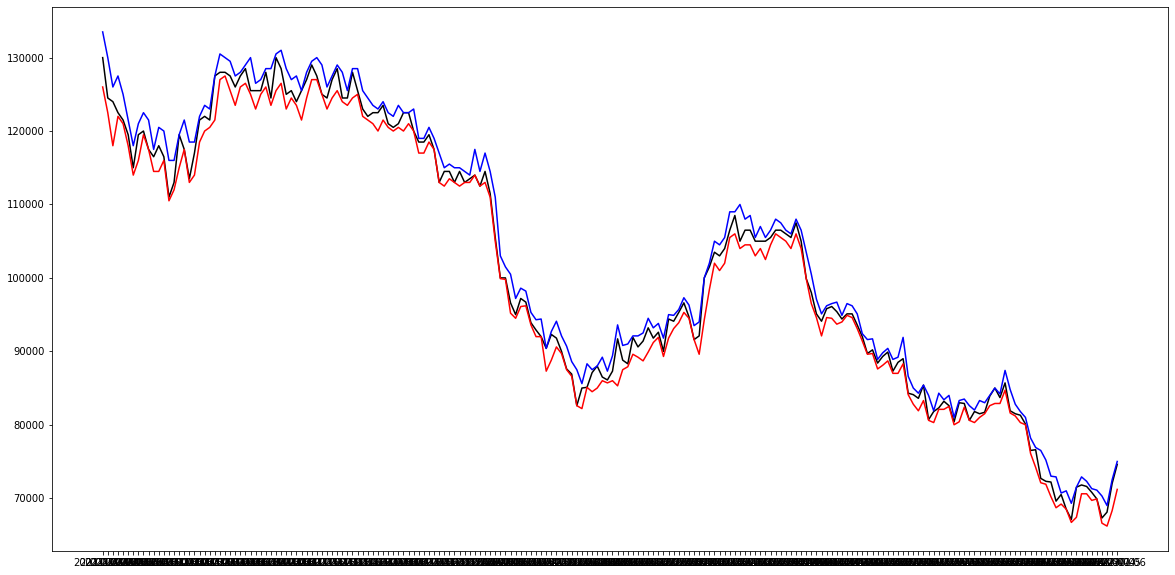

In [164]:
plt.figure(figsize = (20, 10))
plt.plot(x_val, y_val, color = 'black')
plt.plot(x_val, y_val_low, color = 'red')
plt.plot(x_val, y_val_high, color = 'blue')
plt.show()

In [165]:
symbol_code = get_symbol_code('카카오')
summary_data = get_chart_summary(symbol_code)
chart_data = get_chart_data(symbol_code)

In [166]:
def _make_line_chart(chart_data):
    x_val = []
    y_val = []
    y_val_low = []
    y_val_high = []
    for c in chart_data[150:]:
        x_val.append(c['date'])
        y_val.append(c['tradePrice'])
        y_val_high.append(c['highPrice'])
        y_val_low.append(c['lowPrice'])
    plt.figure(figsize=(20, 10))
    plt.plot(x_val,y_val, color='black')
    plt.plot(x_val,y_val_high, color='red')
    plt.plot(x_val,y_val_low, color='blue')

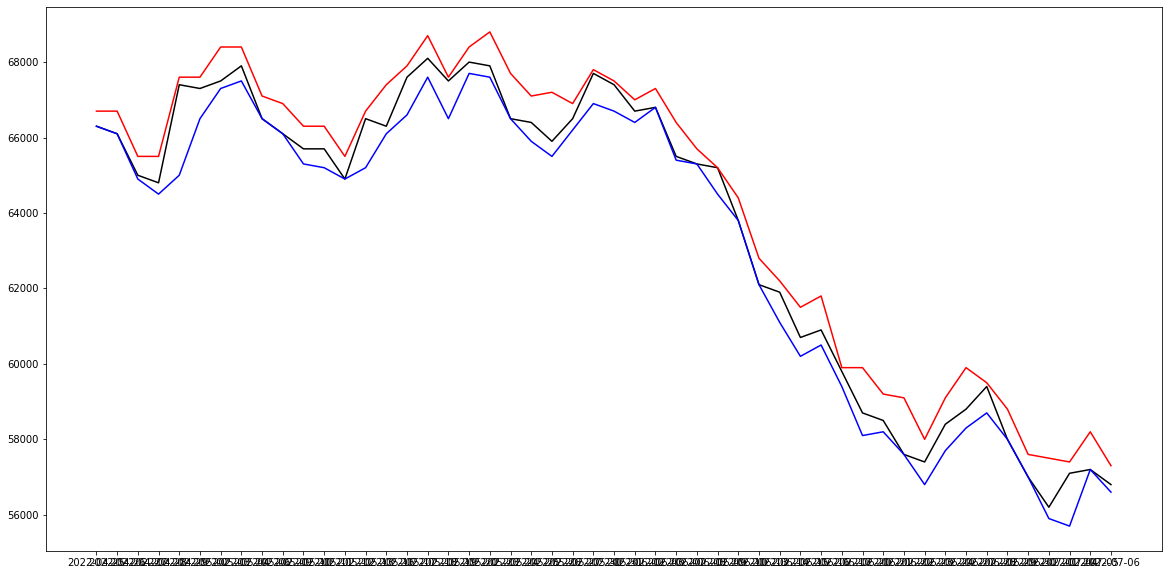

In [168]:
symbol_code = get_symbol_code('삼성전자')
summary_data = get_chart_summary(symbol_code)
chart_data = get_chart_data(symbol_code)
_make_line_chart(chart_data)

In [169]:
summary = {}
summary['종목']=summary_data['name']
summary['날짜']=summary_data['date']
summary['가격']=summary_data['tradePrice']
summary['시가']=summary_data['openingPrice']
summary['고가']=summary_data['highPrice']
summary['저가']=summary_data['lowPrice']
summary['거래량']=summary_data['accTradeVolume']

In [170]:
summary

{'종목': '삼성전자',
 '날짜': '2022-07-06',
 '가격': 56700,
 '시가': 57300,
 '고가': 57300,
 '저가': 56600,
 '거래량': 12993210}

In [171]:
df = pd.DataFrame(summary, index = [0])

In [173]:
df

,종목,날짜,가격,시가,고가,저가,거래량
0,삼성전자,2022-07-06,56700,57300,57300,56600,12993210


     종목          날짜     가격     시가     고가     저가       거래량
0  삼성전자  2022-07-06  56700  57300  57300  56600  12993210


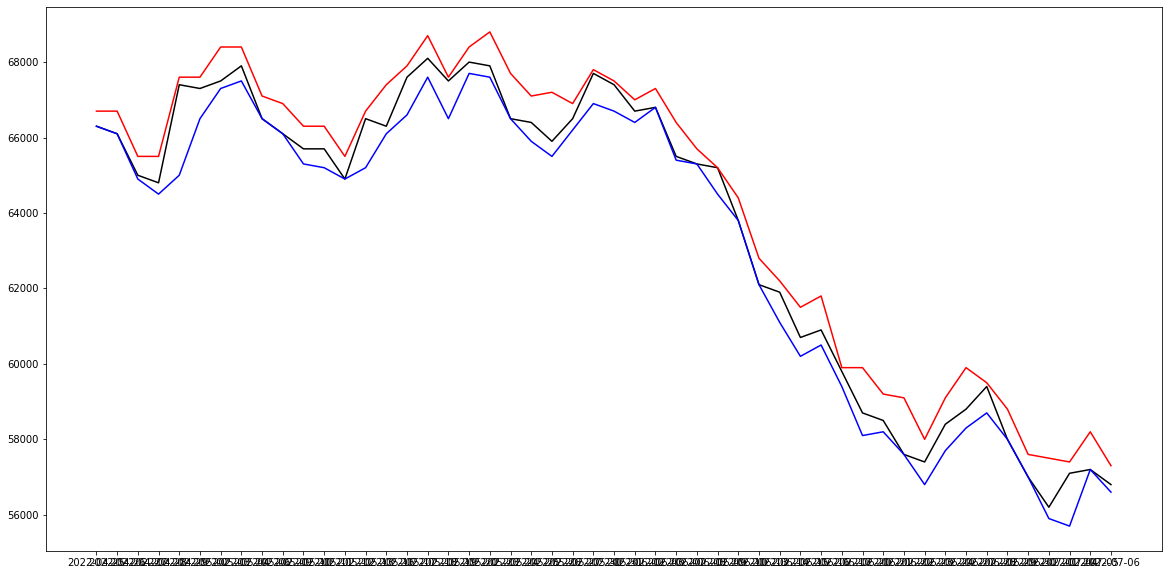

In [174]:
print(df)
_make_line_chart(chart_data)